## פרוייקט על צריכת סמים שונים והשפעתם- 3

#### מגישים: גיל בקלש, איתמר מלניק, טל גיספן ומנחם פרל

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/Itamar-Melnik/My-project/raw/main/Drug_Consumption.csv'
drug_df = pd.read_csv(url)
drug_df.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


## הצגת הנתונים

#### פילוח לפי מוצא

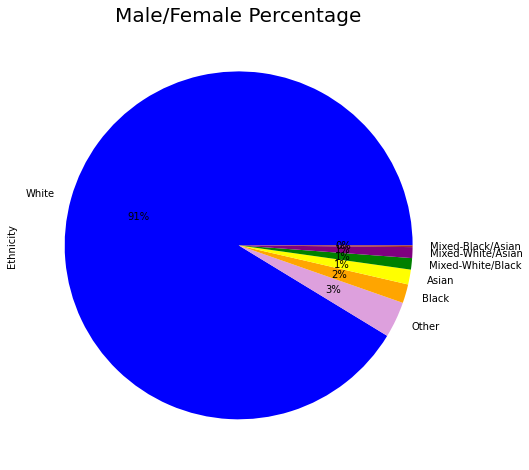

In [3]:
plt.figure(figsize=(10, 8))
plt.title("Male/Female Percentage",fontsize=20)
plotpie=drug_df['Ethnicity'].value_counts().plot.pie(autopct='%1.00f%%',\
colors = ['blue', 'plum', 'orange', 'yellow', 'green', 'purple','brown'])

#### פילוח לפי מין

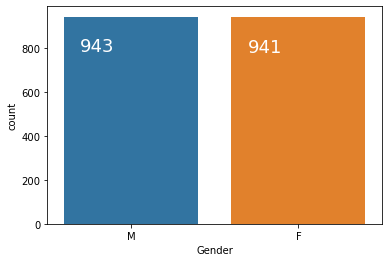

In [4]:
ax=sns.countplot(x=drug_df['Gender'], data = drug_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()),ha='center',va='top',color='white',size=18)

#### פילוח לפי מדינה

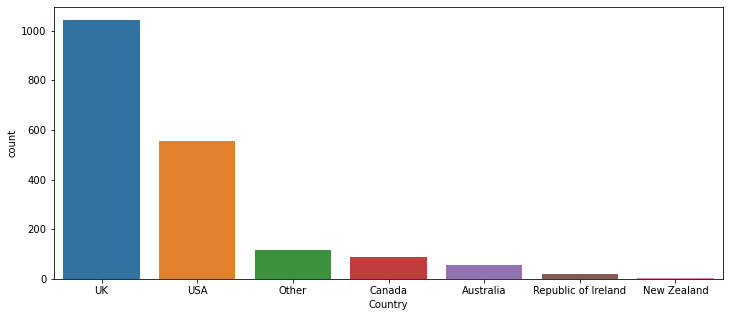

In [5]:
fig, axes = plt.subplots(figsize=(12, 5))
ax2 = sns.countplot(x='Country', data = drug_df, order = drug_df['Country'].value_counts().index)

#### יצרנו עמודה חדשה שמחברת את כל סוגי הסמים הקשים שנעבוד איתם, לעמודה אחת בה מופיעה רמת הצריכה המקסימלית מסם קשה כלשהו

In [6]:
drug_df['heavy_dr']=drug_df\
[['Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer']].max(axis=1)

#### החלפנו את רמת הצריכה לערכים מספריים

In [7]:
drug_df = drug_df.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])

#### רמת הצריכה מדורגת מ-0 ל-6 כאשר שש היא רמת הצריכה יום יומית ואפס היא רמת צריכה אפסית

#### פילוח צריכה לפי סוג הסם

<AxesSubplot:xlabel='heavy_dr', ylabel='count'>

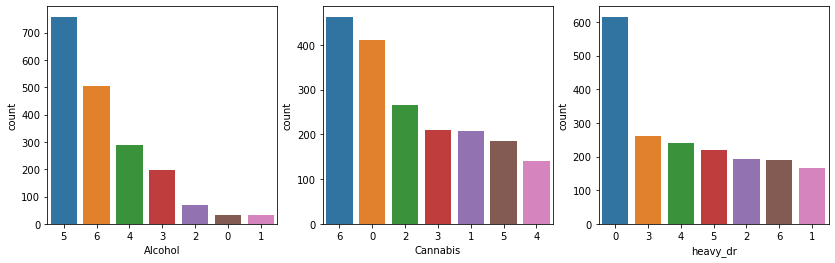

In [8]:
fig, axes = plt.subplots(figsize=(14, 4),ncols=3)
sns.countplot(data=drug_df, x='Alcohol',ax=axes[0], order = drug_df['Alcohol'].value_counts().index)
sns.countplot(x="Cannabis", data=drug_df, ax=axes[1], order = drug_df['Cannabis'].value_counts().index)
sns.countplot(x='heavy_dr',data=drug_df, ax=axes[2], order = drug_df['heavy_dr'].value_counts().index)

#### פילוח לפי השכלה

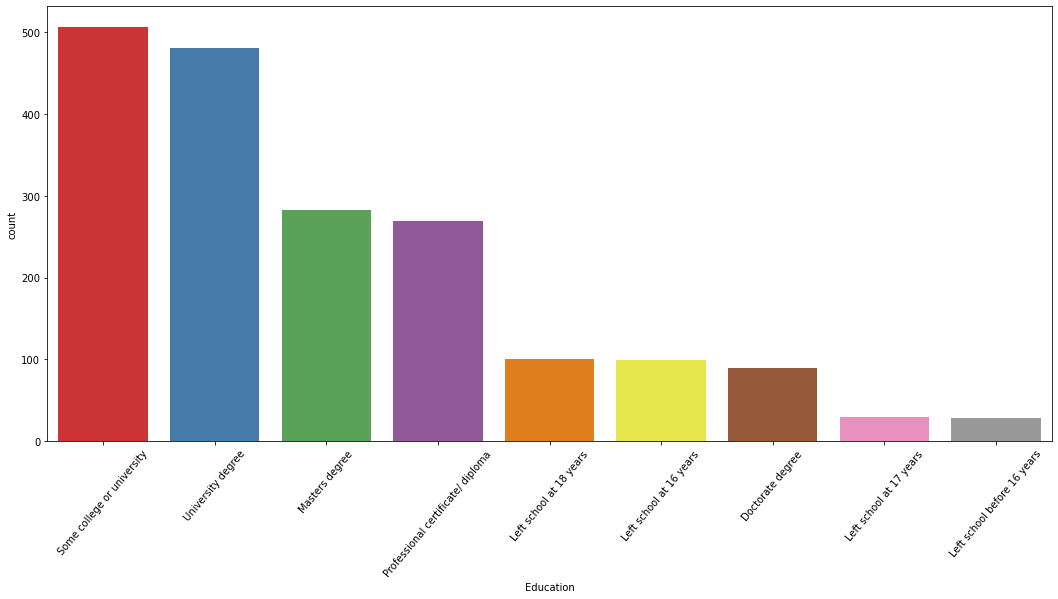

In [9]:
drug_df=drug_df.replace(['Some college or university, no certificate or degree'],['Some college or university'])
plt.figure(figsize=(18,8))
chart = sns.countplot(data=drug_df,x='Education',palette='Set1',order = drug_df['Education'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=50)
None

#### פילוח לפי גיל

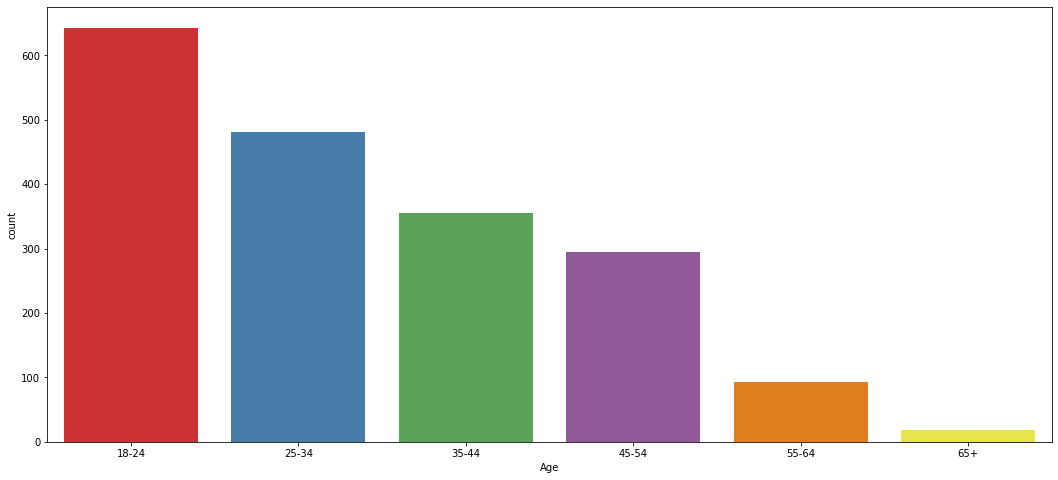

In [10]:
plt.figure(figsize=(18,8))
chart = sns.countplot(data=drug_df,x='Age',palette='Set1',order = drug_df['Age'].value_counts().index)

### אנחנו ניגשים לנתונים מטעם משרד הבריאות במטרה למגר את כמות צריכת הסמים
### לכן ננסה לנתח מי הם הצורכים העיקריים ומהם הגורמים לצריכה

## ניתוח הנתונים

<AxesSubplot:>

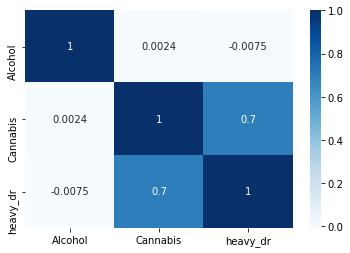

In [11]:
corr_data = drug_df[['Alcohol','Cannabis','heavy_dr']].corr(method='spearman')
sns.heatmap(data=corr_data,cmap='Blues', annot=True)

### יש קשר ישיר בין צריכת קנאביס לצריכת סמים קשים, כלומר ככל שבנאדם צורך יותר קנאביס כך הסיכוי שלו לצרוף סמים קשים עולה.
### לא נמצא קשר בין צריכת אלכוהול לצריכת סמים קלים או קשים. 

#### שינינו את טווחי הגילאים לממוצא שלהם

In [12]:
drug_df=drug_df.replace(['18-24','25-34','35-44','45-54','55-64','65+'],[21,30,40,50,60,70])

#### נבדוק קורולציה בין צריכת סמים לגיל

<AxesSubplot:xlabel='Age', ylabel='heavy_dr'>

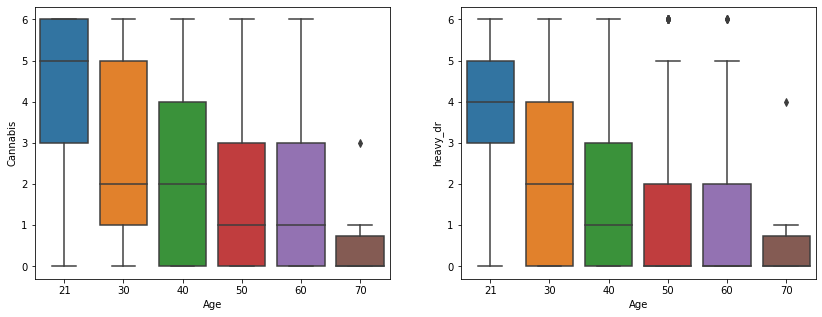

In [13]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Age' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Age' ,y= 'heavy_dr',ax=axes[1])

### יש קורלציה בין גיל לשימוש בסמים קשים וגם לצריכת קנאביס. ע"פ הגרפים מלמעלה, ניתן לראות כי ככל שהגיל צעיר יותר יש נטייה גבוהה יותר לצרוך סמים.

#### נשווה בין מין לצריכת סמים

<AxesSubplot:xlabel='Gender', ylabel='heavy_dr'>

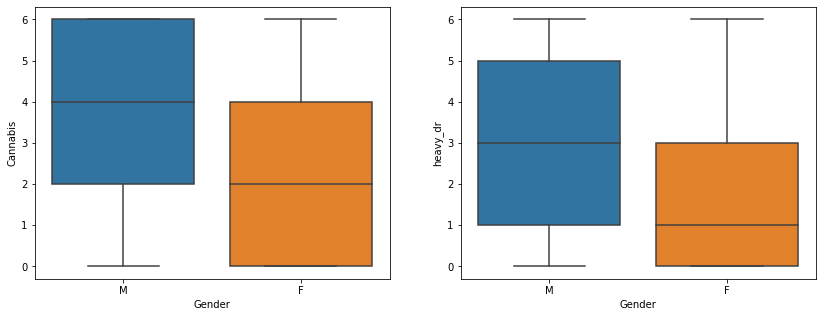

In [14]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'heavy_dr',ax=axes[1])

### בהשוואה בין גברים לנשים, ניתן לראות כי גברים באופן כללי נוטים לצרוך יותר סמים מנשים.

#### לבין צריכת סמים (Oscore) נשווה בין פתיחות לחוויות

<AxesSubplot:xlabel='Cannabis', ylabel='Oscore'>

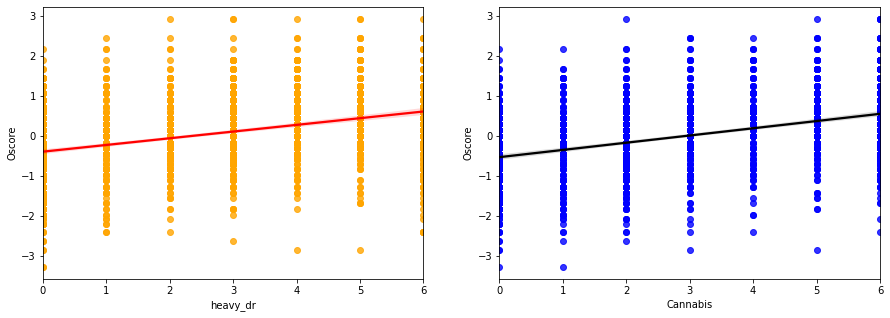

In [15]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data=drug_df, x='heavy_dr', y='Oscore',scatter_kws={"color": "orange"}, line_kws={"color": "red"},ax=axes[0])
sns.regplot(data=drug_df, x='Cannabis', y='Oscore',scatter_kws={"color": "blue"}, line_kws={"color": "black"},ax=axes[1])

### פתיחות לחוויות משפיעה באופן ישיר על כמות צריכת סמים

#### נשווה בין מדינות לבין צריכת סמים

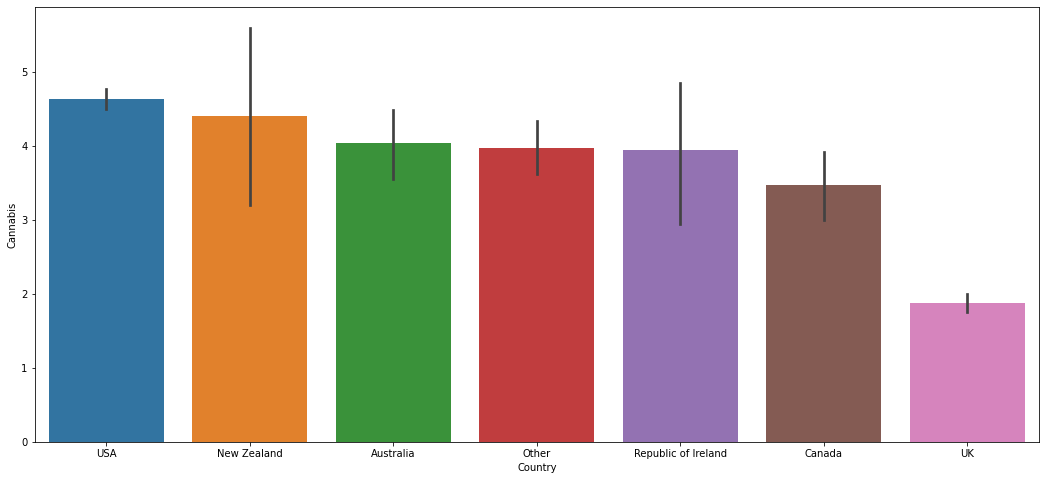

In [19]:
sorted_order = drug_df.groupby(['Country'])['Cannabis'].mean().sort_values(ascending = False).index
plt.figure(figsize=(18,8))
sns.barplot(data=drug_df,x='Country',y='Cannabis', order = sorted_order)
None

### ניתן לראות שבמדינות בהן יש לגיליזציה(אישור לצרוך קנאביס) יש רמת צריכה גבוהה יותר ביחס למדינות בהן אין לגיליזציה, לכן ניתן להניח שלגיליזציה גורמת לעלייה בצריכת השימוש בקנאביס.

#### נבדוק באיזה שלב אקדמאי בחיים צריכת הסמים גבוהה ביותר

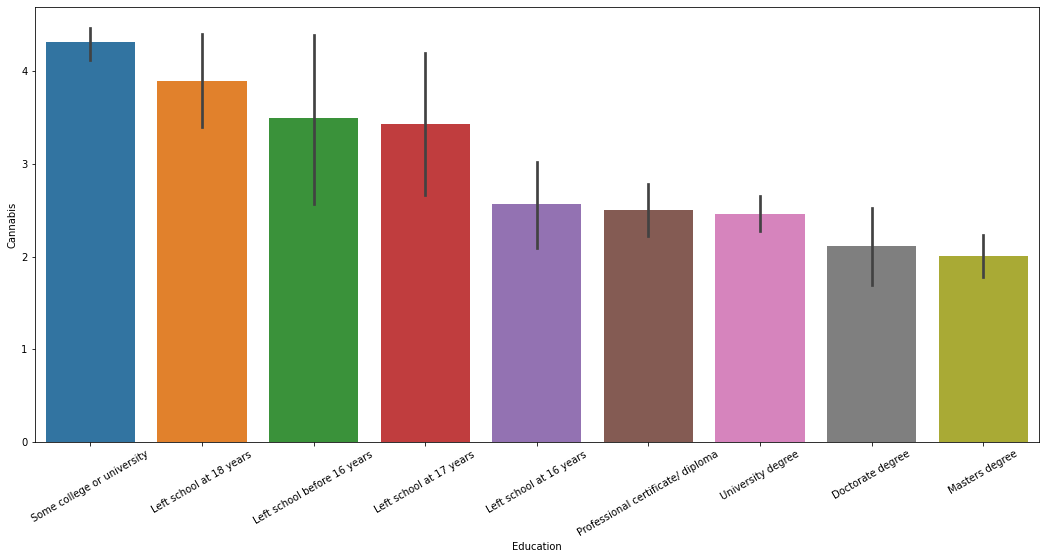

In [17]:
sorted_order = drug_df.groupby(['Education'])['Cannabis'].mean().sort_values(ascending = False).index
plt.figure(figsize=(18,8))
sns.barplot(data=drug_df,x='Education',y='Cannabis', order = sorted_order)
plt.xticks(rotation=30)
None

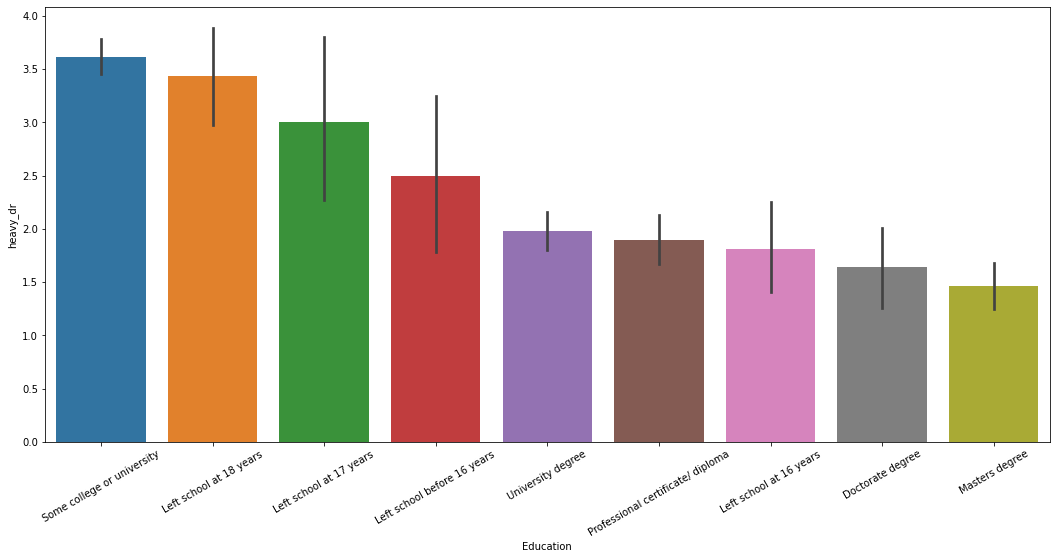

In [18]:
sorted_order = drug_df.groupby(['Education'])['heavy_dr'].mean().sort_values(ascending = False).index
plt.figure(figsize=(18,8))
sns.barplot(data=drug_df,x='Education',y='heavy_dr', order = sorted_order)
plt.xticks(rotation=30)
None

### התקופה של יציאה מבית ספר ותחילת התואר היא התקופה שאנשים צורכים הכי הרבה סמים 

## סיכום המסקנות

### בהתאם למסקנות הנ"ל, אנחנו בתור נציגי משרד הבריאות ממליצים להתמקד במאמץ של מניעת צריכת סמים בעיקר בגיל צעיר אצל אנשים שסיימו תיכון או בתחילת התואר.
### נמליץ להיאבק גם בצריכת סמים קלים, מכיוון שיש קשר ישיר בין שימוש בהם לשימוש בסמים קשים.
### כמו כן, נמליץ להשקיע פחות במאמץ של הפחתת צריכת אלכוהול בשל היעדר הקשר בין צריכת אלכוהול לצריכת סמים.
### מניתוח הנתונים ראינו שפתיחות לחוויות מובילה לצריכה בסמים, לכן המלצתנו היא למצוא תחליף לחווית הצריכה שאינו פוגעני ומסוכן לבריאות. 